In [18]:
import pickle
import cv2

import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec

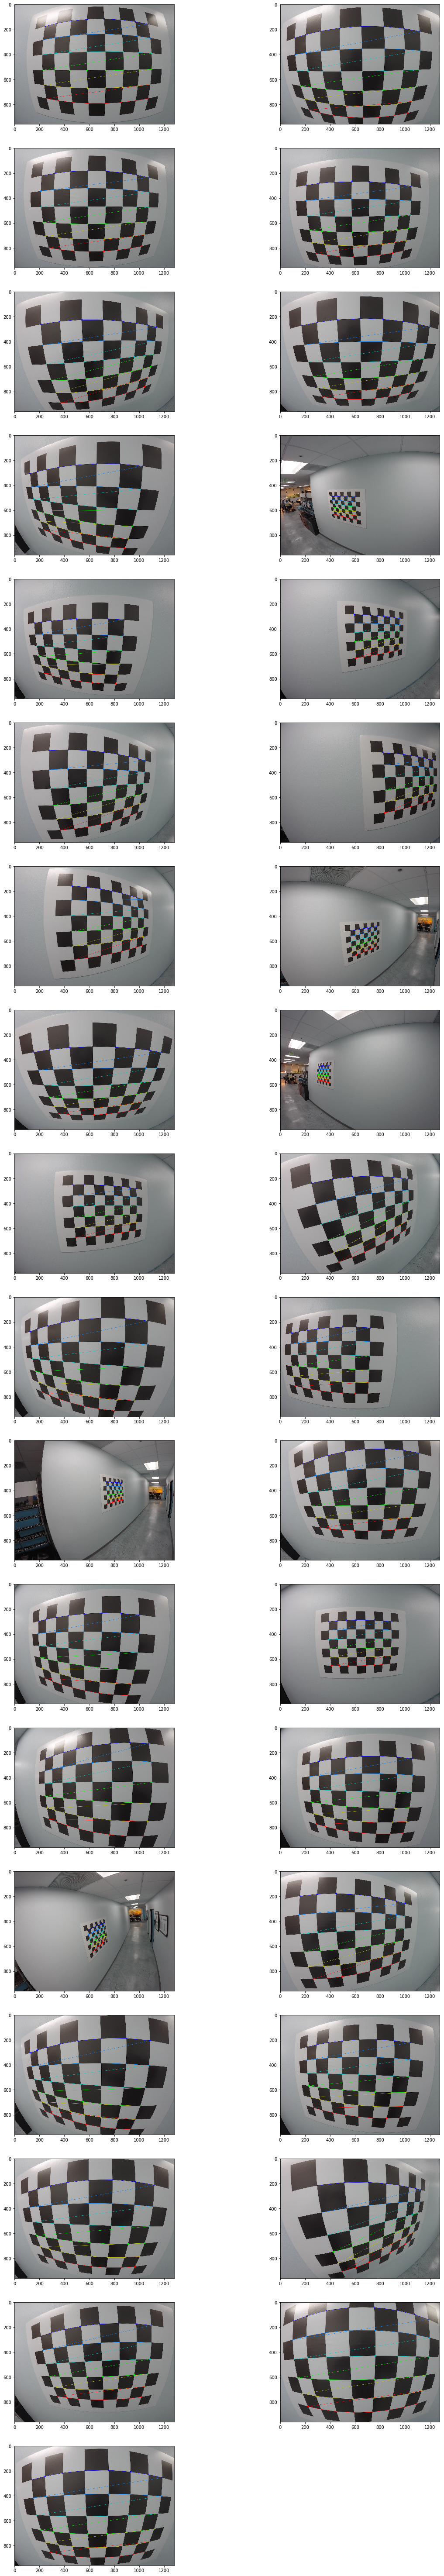

In [25]:
objectPoints = []
imagePoints = []

objP = np.zeros((8*6, 3), np.float32)
objP[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2)
imgFiles = glob.glob('calibration_wide/GO*.jpg')

fig = plt.figure(figsize=(20,120))
gs = gridspec.GridSpec(ncols=2,nrows=20)

i = 0
for imgFile in imgFiles:    
    img = cv2.imread(imgFile)    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (8,6), None)        
    if ret:
        cv2.drawChessboardCorners(img, (8,6), corners, ret)
        ax = fig.add_subplot(gs[i//2, i%2]) 
        ax.imshow(img)
        imagePoints.append(corners)
        objectPoints.append(objP)
        i = i + 1
        

In [32]:
testImage = cv2.imread('calibration_wide/test_image.jpg')
imgSize = testImage.shape[1::-1]
ret, cMtx, dist, rVecs, tVecs = cv2.calibrateCamera(objectPoints, imagePoints, imgSize, None, None)

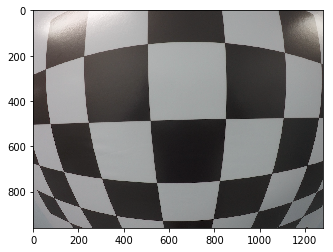

In [36]:
plt.imshow(testImage)

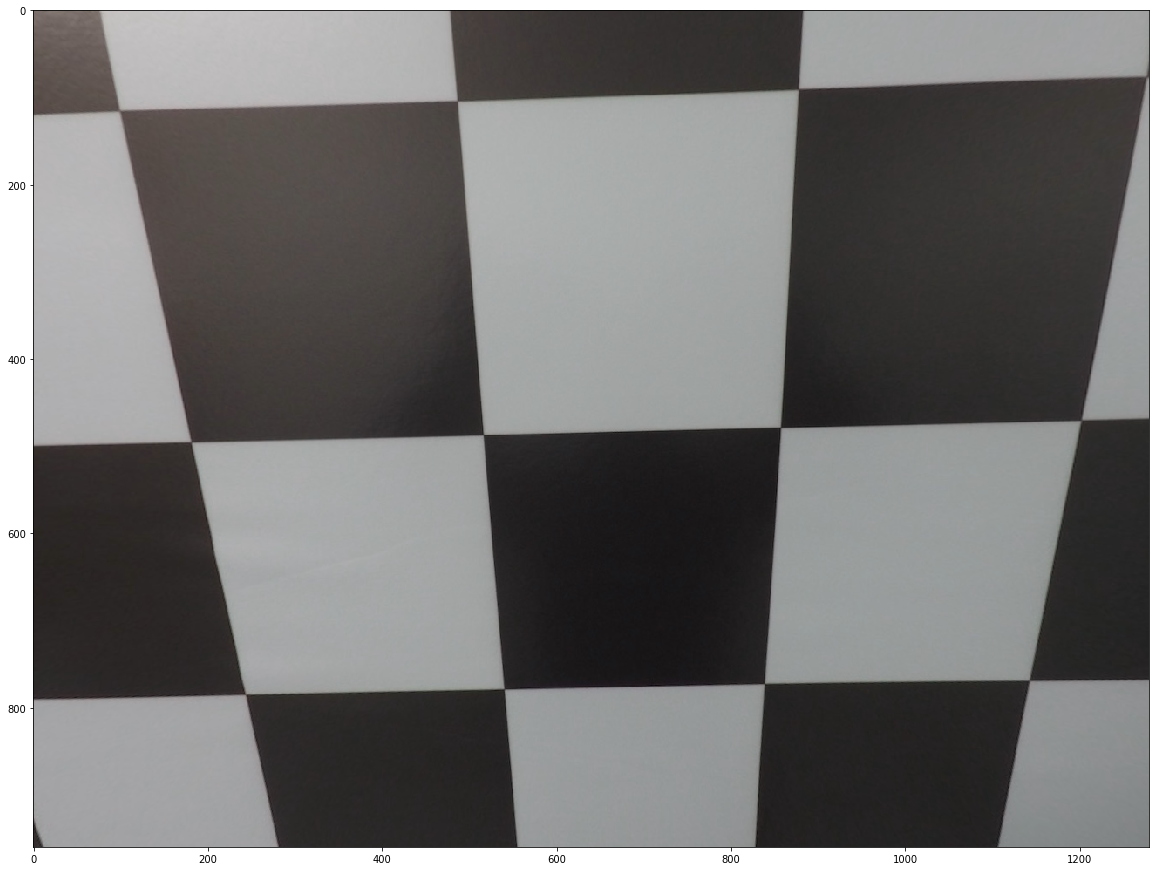

In [38]:
recoverImg = cv2.undistort(testImage, cMtx, dist, None, cMtx)

plt.figure(figsize=(20, 16))
plt.imshow(recoverImg)